# Trabajo práctico integrador - Aprendizaje de Máquina I

## Carrera de Especialización en Inteligencia Artificial / 23Co2025

### Alumnos:

* Paola Andrea Blanco     **(a2303)**
* Facundo Manuel Quiroga  **(a2305)**
* Juan Manuel Fajardo     **(a2310)**
* Victor Gabriel Peralta  **(a2322)**
* Agustín Jesús Vazquez   **(e2301)**

## 1. Introducción y objetivo de trabajo

**Fuente de información de evaluación:** Utilizaremos el dataset [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package), el cual comprende aproximadamente 10 años de observaciones diarias del clima en numerosos lugares de Australia.

**Objetivo:** Queremos predecir si lloverá o no al día siguiente en función de datos meteorológicos del día actual, para integrar esta información en una aplicación meteorológica que beneficie al público.

## 2. Carga de datos y análisis exploratorio (EDA)

En esta sección cargamos el conjunto de datos original y realizamos un breve análisis exploratorio para entender su estructura, distribuciones y valores faltantes.

In [33]:
# Importamos librerías necesarias para el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Cargar dataset
df = pd.read_csv('dataset/weatherAUS.csv')

In [35]:
# Dimensiones del conjunto de datos
print(f"Filas y columnas del dataset: {df.shape}")
# Muestra las primeras 5 filas para observar las columnas
display(df.head())
# Contar valores faltantes por columna (top 10)
missing = df.isnull().sum().sort_values(ascending=False)
print("Valores faltantes por columna (top 10):")
print(missing.head(10))

Filas y columnas del dataset: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Valores faltantes por columna (top 10):
Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
dtype: int64


El dataset original tiene 23 columnas y 145.460 filas, incluyendo variables numéricas continuas (temperaturas, precipitaciones, humedad, presión, etc.), variables categóricas (ubicación geográfica, dirección del viento, etc.), y una columna de fecha. La variable objetivo es RainTomorrow (indicador Sí/No de si llovió al día siguiente). El análisis inicial revela qué columnas tienen datos faltantes y en qué proporción.

In [36]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [38]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [39]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


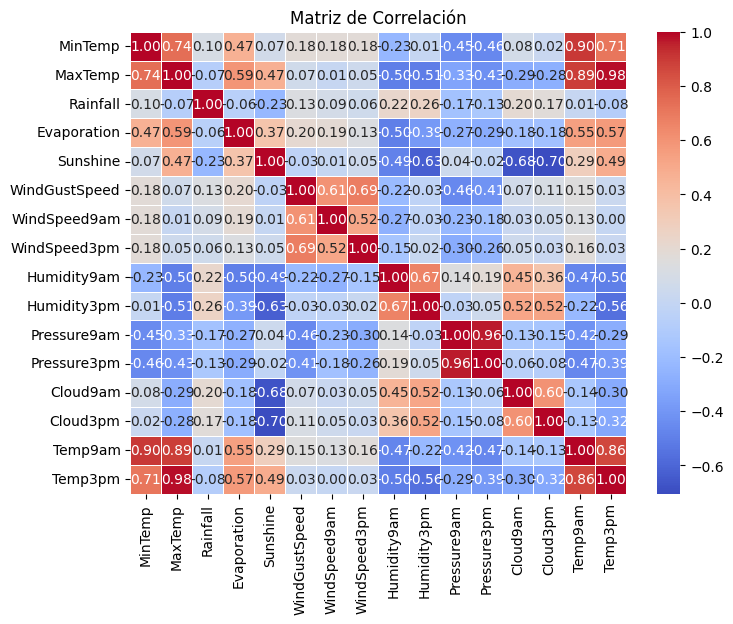

In [40]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [41]:
# Distribución de la variable objetivo
df["RainTomorrow"].value_counts(normalize=True)


RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64

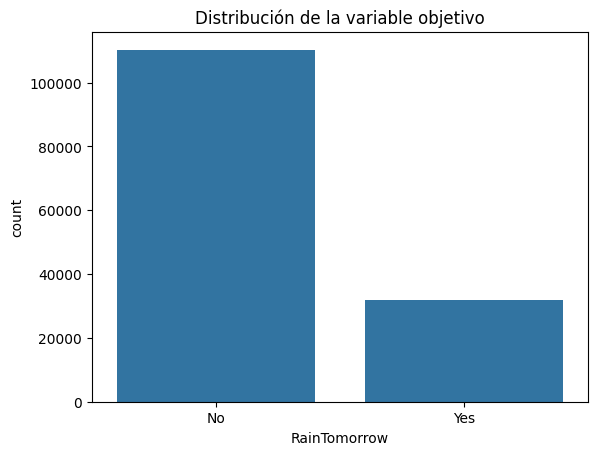

In [42]:
sns.countplot(x="RainTomorrow", data=df)
plt.title("Distribución de la variable objetivo")
plt.show()

Observamos que la variable objetivo está ligeramente desbalanceada, con una proporción mayor de "No" respecto de "Yes". Esto es esperable en un dataset meteorológico, ya que la mayoría de los días no llueve. Este desbalance será tenido en cuenta al evaluar el modelo.

## Preprocesamiento de datos

### 3.1 Preprocesamiento estructural 

En esta sección dejamos el dataset listo para entrenar modelos de clasificación. Los pasos principales son:
1. Eliminación de columnas con alto porcentaje de datos faltantes.
2. Eliminar las filas que no tienen valor en la variable objetivo `RainTomorrow`.
3. Transformar la fecha en una representación cíclica del mes (`Month_sin`, `Month_cos`).

Decidimos no incluir la variable Year como feature porque no aporta información predictiva relevante para la probabilidad de lluvia diaria. La variabilidad interanual en este dataset no representa una tendencia significativa y podría introducir ruido en el modelo. En cambio, la estacionalidad mensual sí es relevante, y por ello se incorporó mediante una codificación cíclica (Month_sin y Month_cos).



In [43]:
# Importar funciones de preprocesamiento desde el módulo
from models import preprocessing

# 1. Limpiar datos 
df_clean = preprocessing.preparar_dataframe(df, target_col="RainTomorrow")

y = df_clean["RainTomorrow"].map({"No": 0, "Yes": 1})
X = df_clean.drop(columns=["RainTomorrow"])

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Columnas categóricas:")
print(cat_cols)

print("\nColumnas numéricas (primeras 10):")
print(num_cols[:10])


Columnas categóricas:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Columnas numéricas (primeras 10):
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']


### 3.2 Train/Test Split

Se divide en conjunto de entrenamiento y prueba (80% train, 20% test)

In [44]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Tamaño de X_train:", X_train.shape, " - Tamaño de X_test:", X_test.shape)
print("Distribución de clases en y_train:")
print(y_train.value_counts())
print("Distribución de clases en y_test:")
print(y_test.value_counts())


Tamaño de X_train: (113754, 23)  - Tamaño de X_test: (28439, 23)
Distribución de clases en y_train:
RainTomorrow
0    88252
1    25502
Name: count, dtype: int64
Distribución de clases en y_test:
RainTomorrow
0    22064
1     6375
Name: count, dtype: int64


## 4. Entrenamiento y evaluación de modelos

En esta sección se entrenan y evalúan diferentes modelos de clasificación binaria para predecir 
la variable objetivo *RainTomorrow* (llueve / no llueve). El objetivo es comparar algoritmos con 
distintas capacidades de modelado —lineales, basados en distancias y basados en árboles— para 
determinar cuáles capturan mejor las relaciones presentes en los datos.

Cada modelo se entrena utilizando un Pipeline que integra el preprocesamiento (imputación, 
codificación categórica mediante OneHotEncoder y, cuando corresponde, escalado de variables 
numéricas). De este modo se evita fuga de información (*data leakage*) y se garantiza que el 
mismo flujo de transformación aplicado al conjunto de entrenamiento se replique de forma 
consistente en el conjunto de prueba.

Los modelos seleccionados representan enfoques diversos:

- **Regresión Logística**: modelo lineal utilizado como baseline.
- **K-Nearest Neighbors (KNN)**: clasificador basado en distancias, sensible a la escala.
- **CART**: árbol de decisión que modela relaciones no lineales mediante particiones sucesivas.
- **Random Forest**: ensamble de árboles que reduce varianza y mejora estabilidad.
- **XGBoost**: algoritmo de boosting que combina árboles secuenciales para optimizar el desempeño.

A continuación se presentan los resultados de cada modelo, incluyendo métricas (accuracy, 
precision, recall, F1 y AUC), matrices de confusión y curvas ROC.


#### Nota sobre SVM (Support Vector Machines)

SVM no se probó porque no escala bien a datasets grandes y con muchas variables categóricas 
codificadas. Su entrenamiento resulta muy costoso y menos efectivo que modelos como Random Forest 
y XGBoost para este problema.

### 4.1 Preprocesadores

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Para modelos de árboles (sin escalado)
numeric_transformer_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Para regresión logística / KNN (con escalado)
numeric_transformer_scaled = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


### 4.2 Regresion Logistica

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_scaled),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_lr = log_reg_pipeline.predict(X_test)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]


In [64]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import matplotlib.pyplot as plt

In [67]:
# 📌 Métricas Regresion Logistica
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc = roc_auc_score(y_test, y_prob_lr)

print(f"\n=== Regresion Logistica ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== Regresion Logistica ===
Accuracy:  0.8494
Precision: 0.7336
Recall:    0.5150
F1:        0.6052
AUC:       0.8730


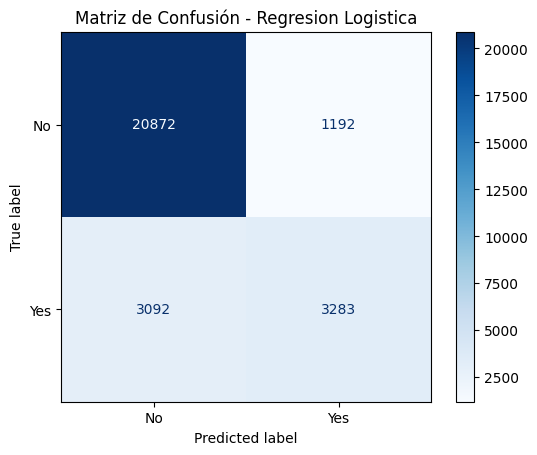

In [68]:
# 📌 Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - Regresion Logistica")
plt.show()

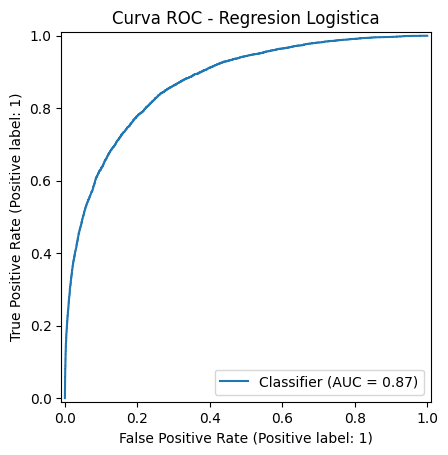

In [70]:
# 📌 Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.title(f"Curva ROC - Regresion Logistica")
plt.show()

### 4.2 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_scaled),      # imputación + OneHot + scaler
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
y_prob_knn = knn_pipeline.predict_proba(X_test)[:, 1]

Accuracy KNN: 0.8417314251555962
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22064
           1       0.71      0.50      0.59      6375

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439



In [71]:
# 📌 Métricas KNN
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_prob_knn)

print(f"\n=== KNN ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== KNN ===
Accuracy:  0.8417
Precision: 0.7072
Recall:    0.5016
F1:        0.5870
AUC:       0.8316


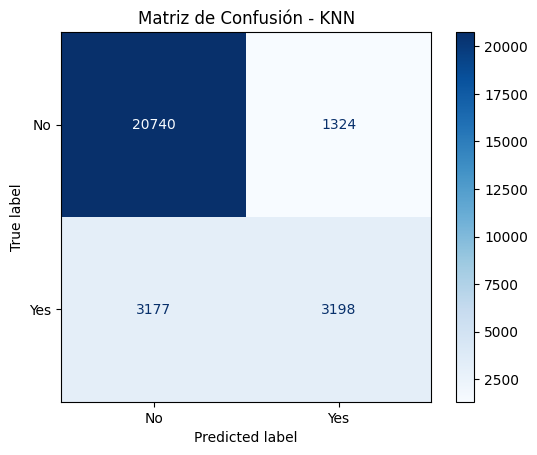

In [72]:
# 📌 Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - KNN")
plt.show()

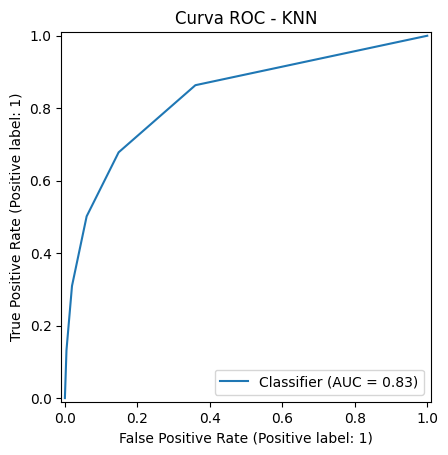

In [73]:
# 📌 Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_knn)
plt.title(f"Curva ROC - KNN")
plt.show()

### 4.3 CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),     # imputación num/cat + OneHot, sin escalado
    ("model", DecisionTreeClassifier(
        max_depth=6,              # controla sobreajuste
        random_state=RANDOM_STATE
    ))
])

# Entrenar
cart_pipeline.fit(X_train, y_train)

# Predecir clases
y_pred_cart = cart_pipeline.predict(X_test)

# Probabilidades para ROC
y_prob_cart = cart_pipeline.predict_proba(X_test)[:, 1]


Accuracy CART: 0.8395161573895004
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22064
         Yes       0.73      0.45      0.56      6375

    accuracy                           0.84     28439
   macro avg       0.79      0.70      0.73     28439
weighted avg       0.83      0.84      0.83     28439



In [74]:
# 📌 Métricas
acc = accuracy_score(y_test, y_pred_cart)
prec = precision_score(y_test, y_pred_cart)
rec = recall_score(y_test, y_pred_cart)
f1 = f1_score(y_test, y_pred_cart)
auc = roc_auc_score(y_test, y_prob_cart)

print(f"\n=== CART ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== CART ===
Accuracy:  0.8395
Precision: 0.7280
Recall:    0.4535
F1:        0.5589
AUC:       0.8424


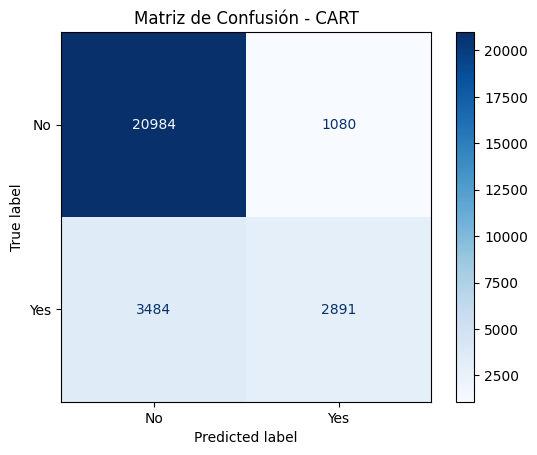

In [75]:
# 📌 Matriz de confusión
cm = confusion_matrix(y_test, y_pred_cart)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - CART")
plt.show()

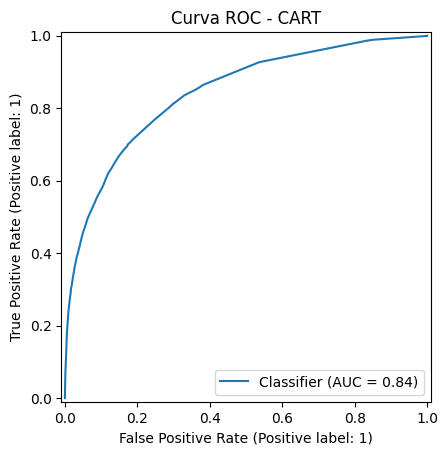

In [76]:
# 📌 Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_cart)
plt.title(f"Curva ROC - CART")
plt.show()

### 4.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]


Accuracy Random Forest: 0.8582580259502796
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.79      0.51      0.62      6375

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



In [80]:
# 📌 Métricas
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_prob_rf)

print(f"\n=== Random Forest ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== Random Forest ===
Accuracy:  0.8583
Precision: 0.7854
Recall:    0.5059
F1:        0.6154
AUC:       0.8908


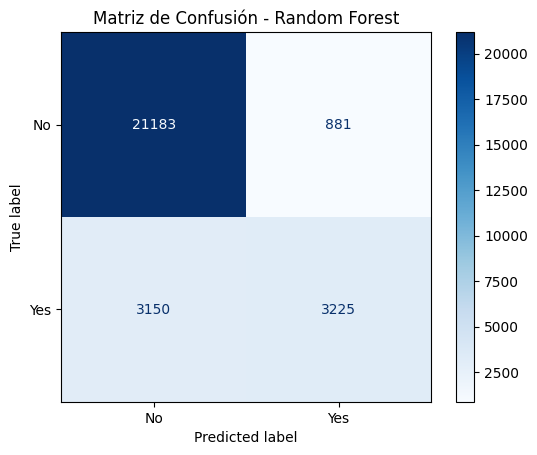

In [81]:
# 📌 Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - Random Forest")
plt.show()

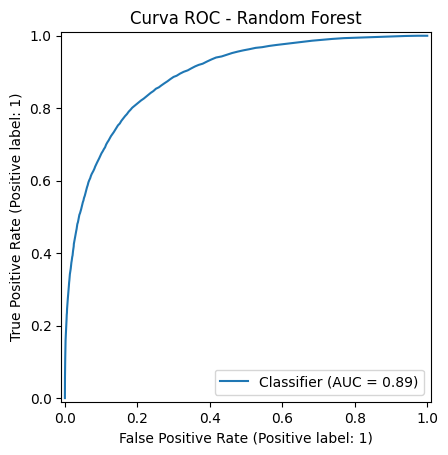

In [82]:
# 📌 Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title(f"Curva ROC - Random Forest")
plt.show()

### 4.4 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),  # imputación num/cat + OneHot
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss"   # para binaria
    ))
])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]


Accuracy XGBoost: 0.8591019374802208
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22064
           1       0.76      0.54      0.63      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439



In [83]:
# 📌 Métricas
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_prob_xgb)

print(f"\n=== XGBoost ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")
print(f"AUC:       {auc:.4f}")


=== XGBoost ===
Accuracy:  0.8591
Precision: 0.7632
Recall:    0.5385
F1:        0.6315
AUC:       0.8945


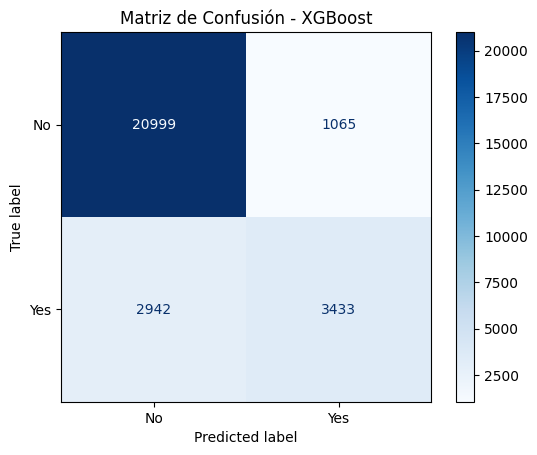

In [84]:
# 📌 Matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - XGBoost")
plt.show()

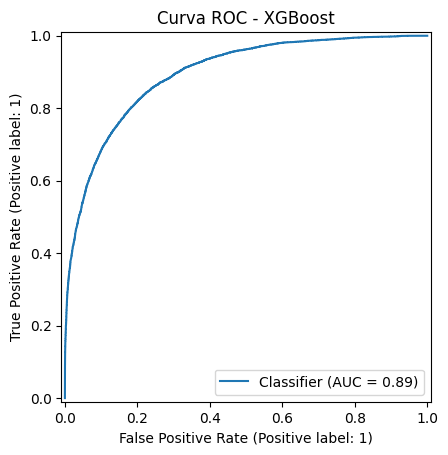

In [85]:
# 📌 Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_xgb)
plt.title(f"Curva ROC - XGBoost")
plt.show()

# HASTA AQUI LLEGUE 

Faltaria: Calibracion. Y lo de Optuna.

## 5. Calibración de probabilidades

Algunos modelos (especialmente Random Forest, etc.) pueden no estar bien **calibrados** en términos de probabilidad – es decir, la probabilidad estimada de "lluvia" podría no reflejar la frecuencia real observada. Por ejemplo, puede predecir "0.9" de probabilidad de lluvia en muchos casos donde en realidad sólo llueve en un 70% de ellos (sobreestimación). Para mejorar esto, aplicamos **calibración** de probabilidades:
- **Platt Scaling (Sigmoide)**: ajusta una regresión logística sobre las salidas del modelo original.
- **Isotonic Regression (Regresión Isotónica)**: ajusta un modelo no paramétrico monotónico sobre las probabilidades, más flexible pero con riesgo de sobreajuste si hay pocos datos.

A continuación calibramos el modelo Random Forest (uno de los más precisos) usando ambos métodos y comparamos.

In [ ]:
from models import calibratecopy1

# Calibrar Random Forest con Platt Scaling (sigmoide) usando validación cruzada en el conjunto de entrenamiento
calibrated_rf_platt = calibratecopy1.calibrate_platt_cv(X_train_proc, y_train, model_rf)
# Calibrar Random Forest con Regresión Isotónica
calibrated_rf_iso = calibratecopy1.calibrate_isotonic_cv(X_train_proc, y_train, model_rf)

# Obtener nuevas probabilidades calibradas en el conjunto de prueba
y_prob_rf_platt = calibrated_rf_platt.predict_proba(X_test_proc)[:, 1]
y_prob_rf_iso   = calibrated_rf_iso.predict_proba(X_test_proc)[:, 1]

# Calcular Brier score antes y después de calibración
brier_before = metrics_utils.brier_score(y_test, y_prob_rf)
brier_platt  = metrics_utils.brier_score(y_test, y_prob_rf_platt)
brier_iso    = metrics_utils.brier_score(y_test, y_prob_rf_iso)
print(f"Brier score (Random Forest) sin calibrar: {brier_before:.4f}")
print(f"Brier score calibrado (Platt): {brier_platt:.4f}")
print(f"Brier score calibrado (Isotónica): {brier_iso:.4f}")

In [ ]:
# Graficar curvas de calibración (diagramas de confiabilidad) para Random Forest antes y después
plt.figure(figsize=(6,4))
metrics_utils.plot_calibration_curve(y_test, y_prob_rf, label="RF sin calibrar")
metrics_utils.plot_calibration_curve(y_test, y_prob_rf_platt, label="RF calibrado (Platt)")
metrics_utils.plot_calibration_curve(y_test, y_prob_rf_iso, label="RF calibrado (Isotónica)")
plt.title("Curvas de Calibración - Random Forest")
plt.legend(loc="upper left")
plt.show()